# Tilastollista laskentaa CMS:n datalla

Pythonilla voidaan laskea helposti tilastollisia tunnuslukuja CMS:n avoimelle datalle. Tutustutaan seuraavaksi keskiarvon, varianssin ja keskihajonnan laskemiseen. Käytetään CMS:n törmäysdataa tiedostossa _Jpsimumu_\__Run2011A.csv_, johon on valittu tietyin kriteerein [1] törmäystapahtumia CMS:n vuoden 2011 DoubleMu-datasetistä [2]. Aloitetaan laskeminen hakemalla tarvittavat moduulit sekä data, ja valitsemalla datasta valmiiksi lasketut invariantin massan arvot.
<br>
<br>
<br>
[1] Thomas McCauley (2016). Jpsimumu. Jupyter Notebook file. https://github.com/tpmccauley/cmsopendata-jupyter/blob/hst-0.1/Jpsimumu.ipynb.
<br>
[2] CMS collaboration (2016). DoubleMu primary dataset in AOD format from RunA of 2011 (/DoubleMu/Run2011A-12Oct2013-v1/AOD). CERN Open Data Portal. DOI: [10.7483/OPENDATA.CMS.RZ34.QR6N](http://doi.org/10.7483/OPENDATA.CMS.RZ34.QR6N).

### Alustus ja histogrammin piirtäminen

In [1]:
# Haetaan tarvittavat moduulit. Nimetään pandas-moduuli 'pd'ksi, numpy-moduuli 'np'ksi
# ja matplotlib.pyplot 'plt'ksi.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

datasetti = pd.read_csv('Data/Jpsimumu_Run2011A.csv')
inv_massa = datasetti['M']

<br>
Piirretään datasettimme invarianteista massoista aluksi histogrammi:

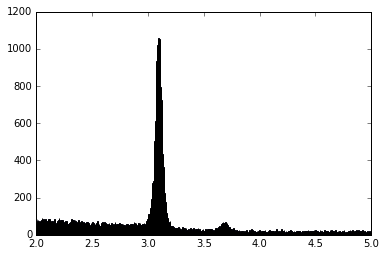

In [2]:
plt.hist(inv_massa, bins=500)
plt.show()

Valitaan sitten vain ensimmäisen, korkeamman piikin alueella oleva data.

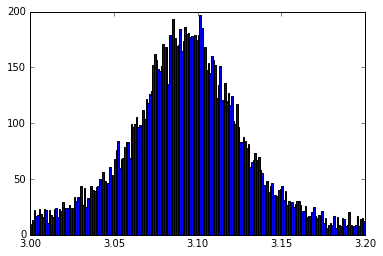

In [3]:
uusi_data = datasetti[(inv_massa>3.0) & (inv_massa<3.2)]
piikin_massa = uusi_data['M']
plt.hist(piikin_massa, bins=200)
plt.show()

### Keskiarvo $\bar x$

Keskiarvon laskeminen onnistuu kätevästi _numpy_-moduulin funktiolla _mean( )_. Lasketaan keskiarvo käyttämämme koko datasetin invarianteille massoille:

In [4]:
keskiarvo = np.mean(inv_massa)
print(keskiarvo)

3.08437363445


Ja sitten piikin alueelle:

In [5]:
keskiarvo_piikki = np.mean(piikin_massa)
print(keskiarvo_piikki)

3.09342552934


### Varianssi $\sigma^2$

Varianssille on määritetty lauseke $$\sigma^2 = \frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n}.$$

Pythonilla varianssin laskeminen onnistuu _numpy_-moduulin funktiolla _var( )_. Lasketaan invarianteille massoille varianssi:

In [6]:
varianssi = np.var(inv_massa)
print(varianssi)

0.39216919089


Ja sama piikin alueelle:

In [7]:
varianssi_piikki = np.var(piikin_massa)
print(varianssi_piikki)

0.00129081436849


### Keskihajonta $\sigma$

Koska keskihajonta on varianssin neliöjuuri, voimme laskea invarianteille massoille keskihajonnan helposti edellä lasketun varianssin avulla. Käytetään _numpy_:n funktiota _sqrt( )_, joka laskee sille annetun arvon neliöjuuren:

In [8]:
keskihajonta = np.sqrt(varianssi)
print(keskihajonta)

0.626234134242


Ja sama piikille:

In [9]:
keskihajonta_piikki = np.sqrt(varianssi_piikki)
print(keskihajonta_piikki)

0.0359279051503


### Kysymys

Osaatko selittää erot näissä statistisissa arvoissa?